# Game Manager

## Setup

In [2]:
%pip install -r requirements.txt
%pip install ipywidgets
%pip install ipyfilechooser

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Management GUI

Loaded 297 games


Button(description='Save gamelist', style=ButtonStyle())

Last update failed. Error:  Unknown string format: V1.10
{'url': 'https://allthefallen.moe/forum/index.php?threads/the-secret-summer-holidays-v1-10-ue4.32390/', 'source': 'AllTheFallen', 'title': 'The secret Summer Holidays v1.10', 'cover_img': '', 'description': "Here is Tofu Soft's new game: The secret Summer Holidays\n\n\n\nGame Engine: UE4\n\nWhat has been done to the game?\n\nCryption removal\nFiles added to make the game work in uncooked state\nUncensor (DX11 mandatory!)\nChapter uncensor\nEnglish translation | by me and Tyron56\nBottom menu | lit text = on /...", 'published': '2022-05-31', 'developer': 'TOFU SOFT', 'os': ['Windows'], 'language': ['JAPANESE / ENGLISH'], 'tags': ['3duncensored', 'dress up', '-tofu soft', '3dwindows', '3denglish translation', 'tanned skin'], 'status': <GameStatus.UNKNOWN: 'unknown'>, 'game_engine': <GameEngine.UNKNOWN: 'unknown'>, 'game_render': <GameRender.UNKNOWN: 'unknown'>}
New tag found: -tofu soft
New tag found: 3denglish translation
New tag 
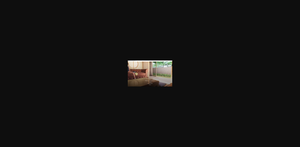

In [1]:
import ipywidgets as widgets
from ipyfilechooser import FileChooser
from IPython.display import display, clear_output

from dataclasses import dataclass, field, asdict
import datetime

from src.ScraperRepository import ScraperRepository
from src.GameScraper import GameScraper
from src.Game import Game
from src.GameList import GameList

from src.scrapers.AllTheFallenGameScraper import AllTheFallenGameScraper
# from src.scrapers.DikgamesGameScraper import DikgamesGameScraper
from src.scrapers.F95zoneGameScraper import F95zoneGameScraper
from src.scrapers.FapNationGameScraper import FapNationGameScraper
from src.scrapers.LewdCornerGameScraper import LewdCornerGameScraper
from src.scrapers.RoriwalrusGameScraper import RoriwalrusGameScraper


repository = ScraperRepository()
repository.add(AllTheFallenGameScraper)
# repository.add(DikgamesGameScraper)
repository.add(F95zoneGameScraper)
repository.add(FapNationGameScraper)
repository.add(LewdCornerGameScraper)
repository.add(RoriwalrusGameScraper)

gamelist = GameList(repository=repository)
gamelist.load()

url_input = widgets.Text(description="Url:")
add_from_url_button = widgets.Button(description="Add / Update game from Url")
def add_from_url(b):
    url = url_input.value
    if url:
        gamelist.add_game_from_url(url)
    print("DONE")
add_from_url_button.on_click(add_from_url)

save_button = widgets.Button(description="Save gamelist")
def save_changes(b):
    gamelist.save()
    gamelist.create_index()
save_button.on_click(save_changes)

filename_input = FileChooser(
    './',  # Default directory
    filename='urls.txt',  # Optional: Pre-fill filename
    select_default=False,  # Start without pre-selected file
    title='Select a fext file with URLs to add',  # Title displayed above the widget
)
add_from_file_button = widgets.Button(description="Start import")
def import_from_file(b):
    selected_file = filename_input.selected
    if selected_file:
        with open(selected_file, 'r', encoding='utf-8') as file:
            for line in file:
                clean_line = line.strip()
                # Ignore empty lines and comment lines
                if clean_line and not clean_line.startswith("#"):
                    print(f"Importing {clean_line}")
                    try:
                        gamelist.add_game_from_url(clean_line)
                    except Exception as e:
                        print(f"Error importing '{clean_line}': {e}")
    print("DONE")
add_from_file_button.on_click(import_from_file)


check_all_for_updates_button = widgets.Button(description="Check all for updates")
# TODO
# Add dropdown to limit to a source
# Checkbox to include completed ones as well
def check_all_for_updates(b):
    print(f"Checking for updates, {datetime.datetime.now()}")
    updates = gamelist.check_for_updates(immediate_update=True)
    print(f"{len(updates)} updates found, {datetime.datetime.now()}")
    print("DONE")
check_all_for_updates_button.on_click(check_all_for_updates)

add_from_url_ui = widgets.HBox([url_input, add_from_url_button])
add_from_url_file = widgets.HBox([filename_input, add_from_file_button])
updates_ui = widgets.HBox([check_all_for_updates_button])
display(add_from_url_ui, add_from_url_file, updates_ui, save_button)